#**TP02**



#0- Importing libraries and some usefull functions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)


In [ ]:
#To have always same result on random operations
np.random.seed(42)
np.random.RandomState(42)

RandomState(MT19937) at 0x7F2F10D56270

In [ ]:
#function for more infos on our data set

def resume_table(data):
    #print(f'Data Shape: {data.shape}')
    summary = (pd
               .DataFrame(data.dtypes, columns=['dtypes'])
               .reset_index()
               .rename(columns={'index': 'name'}))
    summary.loc[:, 'missing'] = data.isna().sum().values
    summary.loc[:, '%missing'] = np.round(summary.missing / data.shape[0] * 100, 2)
    summary.loc[:, 'uniques'] = data.nunique().values
    return summary, data.shape

# **1-Load data**

In [ ]:
data_set=pd.read_csv('adult_data.csv',na_values=' ?')

#**2+3-Data cleaning + Exploration**

In [ ]:
data_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0      0.00       73
 1        workclass  object     1836      5.64        8
 2        education  object        0      0.00       16
 3    education_num   int64        0      0.00       16
 4   marital_status  object        0      0.00        7
 5       occupation  object     1843      5.66       14
 6     relationship  object        0      0.00        6
 7             race  object        0      0.00        5
 8              sex  object        0      0.00        2
 9     capital_gain   int64        0      0.00      119
 10    capital_loss   int64        0      0.00       92
 11  hours_per_week   int64        0      0.00       94
 12  native_country  object      583      1.79       41
 13          income  object        0      0.00        2, (32560, 14))

In [ ]:
data_set[data_set.isna().any(axis=1)]

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
13,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
26,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
37,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
50,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
60,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32530,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32540,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


#Replacing '?' with NAN to be able to remove them and clean our data

In [ ]:
for i in data_set.columns :
    data_set[i].replace(' ?', np.NaN, inplace=True)

In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0      0.00       73
 1        workclass  object     1836      5.64        8
 2        education  object        0      0.00       16
 3    education_num   int64        0      0.00       16
 4   marital_status  object        0      0.00        7
 5       occupation  object     1843      5.66       14
 6     relationship  object        0      0.00        6
 7             race  object        0      0.00        5
 8              sex  object        0      0.00        2
 9     capital_gain   int64        0      0.00      119
 10    capital_loss   int64        0      0.00       92
 11  hours_per_week   int64        0      0.00       94
 12  native_country  object      583      1.79       41
 13          income  object        0      0.00        2, (32560, 14))

#Drop null values

In [ ]:
data_set.dropna(axis=0,inplace=True)

In [ ]:
resume_table(data_set)

(              name  dtypes  missing  %missing  uniques
 0              age   int64        0       0.0       72
 1        workclass  object        0       0.0        7
 2        education  object        0       0.0       16
 3    education_num   int64        0       0.0       16
 4   marital_status  object        0       0.0        7
 5       occupation  object        0       0.0       14
 6     relationship  object        0       0.0        6
 7             race  object        0       0.0        5
 8              sex  object        0       0.0        2
 9     capital_gain   int64        0       0.0      118
 10    capital_loss   int64        0       0.0       90
 11  hours_per_week   int64        0       0.0       94
 12  native_country  object        0       0.0       41
 13          income  object        0       0.0        2, (30161, 14))

In [ ]:
data_set.isnull().sum().any()

False

In [ ]:
#there is no null or missing values

In [ ]:
data_set['income'].value_counts()

 <=50K    22653
 >50K      7508
Name: income, dtype: int64

In [ ]:
data_set.describe(include='all')

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,30161.000000,30161,30161,30161.000000,30161,30161,30161,30161,30161,30161.000000,30161.000000,30161.000000,30161,30161
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,9840,NaN,14065,4038,12463,25932,20379,NaN,NaN,NaN,27503,22653
mean,38.437883,NaN,NaN,10.121216,NaN,NaN,NaN,NaN,NaN,1091.971984,88.375419,40.931269,NaN,NaN
std,13.134882,NaN,NaN,2.549983,NaN,NaN,NaN,NaN,NaN,7406.466659,404.304753,11.980182,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
data_set.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
#our data set is clean

In [ ]:
data_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


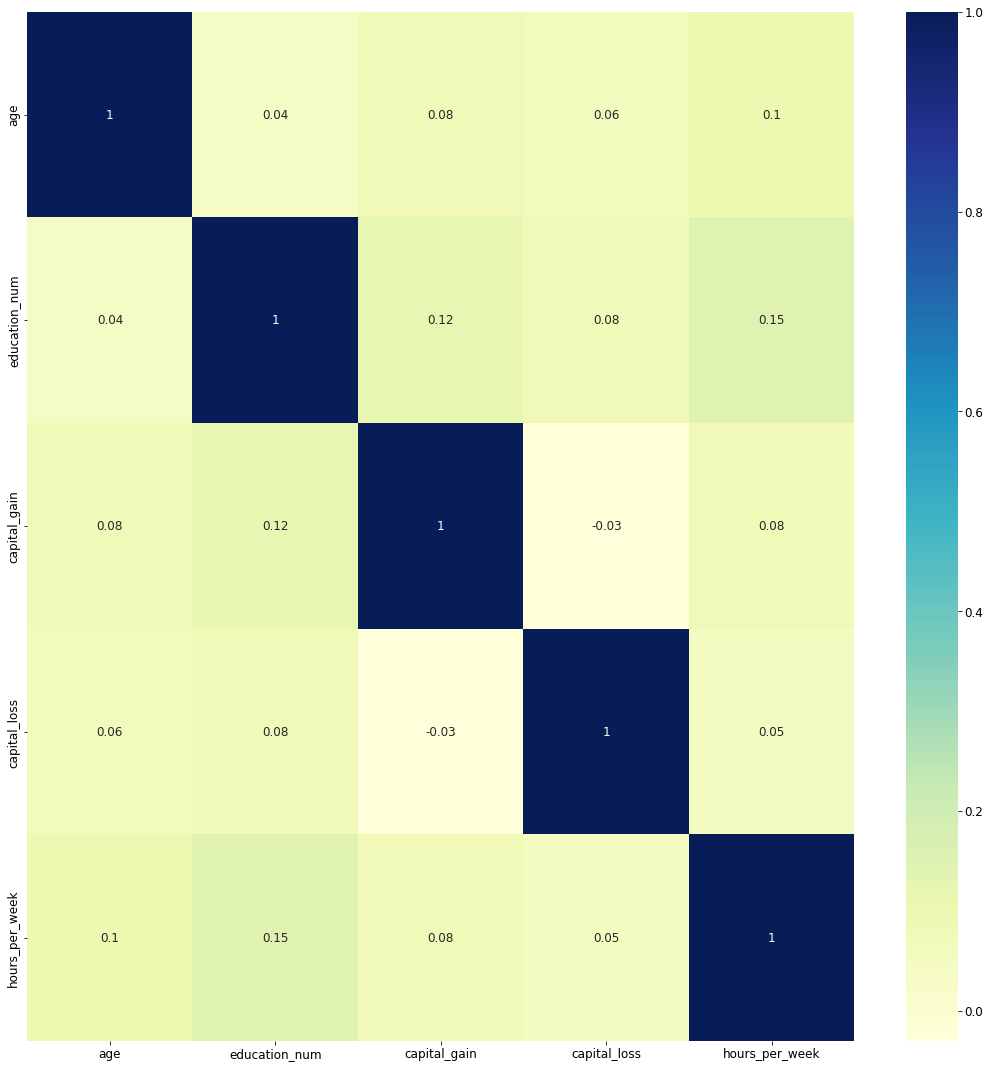

In [ ]:
#Correlation using heatmap
import seaborn as sns

plt.figure(figsize = (15, 15))
sns.heatmap(round(data_set.corr(),2), annot = True, cmap="YlGnBu")
plt.tight_layout()
plt.autoscale()
plt.show()

#checking unique values of our features

In [ ]:
for k in data_set.columns:

    print("\n")
    print('Feature' + "   "+str(k))
    print("\n")
    print(data_set[k].value_counts())



Feature   age


36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64


Feature   workclass


 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


Feature   education


 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


Feature   education_num


9     9840
10    6678
13    5043
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2    

#**3+4- preparing dataset (split...) & Modelisation:**

In [ ]:
X = data_set.drop(['income'], axis=1)
y = data_set['income']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

#Encoding categorical features

In [ ]:
pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country',])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
8841,29,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7734,49,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
473,67,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5923,43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7096,45,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#**gaussian naive bayes**

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

#prediction

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

#**Evaluation** : 

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8077135595093381


#checking for signs of overfitting

In [ ]:
print('\n train set')
print(gnb.score(X_train, y_train))
print('\n test set')
print((gnb.score(X_test, y_test)))


 train set
0.8068870784388026

 test set
0.8077135595093381


In [ ]:
y_test.value_counts()

 <=50K    6870
 >50K     2179
Name: income, dtype: int64

#**Confusing matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5585 1285]
 [ 455 1724]]

True Positives(TP) =  5585

True Negatives(TN) =  1724

False Positives(FP) =  1285

False Negatives(FN) =  455


#visual confusing matrix

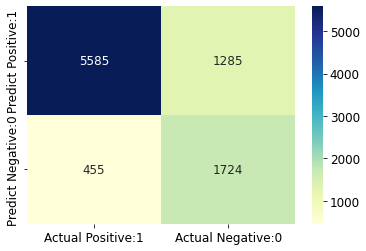

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#sensibilité - précision - F-mesure - spécificité : 

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
sensibilite = TP / float(TP+FN)
precision = TP / float(TP+FP)
Fmesure = 2*TP / float(2*TP + FP + FN)
specificite = TN / float(FP+TN)

In [ ]:
dict={'sensibilite':sensibilite,'precision':precision,'Fmesure':Fmesure,'specificite':specificite}


In [ ]:
for key, value in dict.items():
    print("la valeur de"+"  "+str(key)+"="+"  "+ str(value))

la valeur de  sensibilite=  0.9246688741721855
la valeur de  precision=  0.8129548762736536
la valeur de  Fmesure=  0.8652207591014718
la valeur de  specificite=  0.5729478231970755


Text(0, 0.5, 'Frequency')

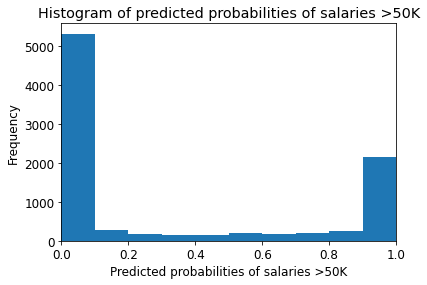

In [ ]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12



plt.hist(y_pred1, bins = 10)



plt.title('Histogram of predicted probabilities of salaries >50K')


plt.xlim(0,1)


plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

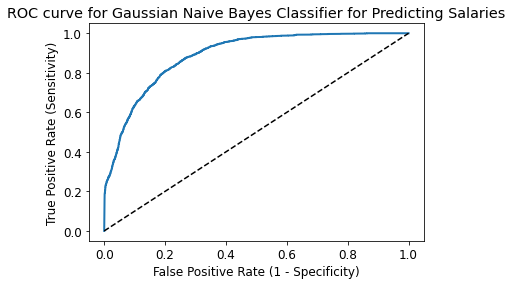

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = ' >50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#AUC


In [ ]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8885


#Cross validation K-folds : 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print(scores)

[0.81392045 0.79876894 0.81288489 0.79819991 0.80625296 0.81004263
 0.81477973 0.80577925 0.79962103 0.80577925]


In [ ]:
scores.mean()

0.8066029043394629

#**Bernouli naive bayes:**  

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import BernoulliNB


# instantiate the model
bnb = BernoulliNB()


# fit the model
bnb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred_bernouli = bnb.predict(X_test)

y_pred_bernouli

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
unique, counts = np.unique(y_pred_bernouli, return_counts=True)

print (np.asarray((unique, counts)).T)

[[' <=50K' '5630']
 [' >50K' '3419']]


In [ ]:
print('\n train set')
print(bnb.score(X_train, y_train))
print('\n test set')
print((bnb.score(X_test, y_test)))


 train set
0.7559208033345964

 test set
0.7588683832467676


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_bernouli)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5159 1711]
 [ 471 1708]]

True Positives(TP) =  5159

True Negatives(TN) =  1708

False Positives(FP) =  1711

False Negatives(FN) =  471


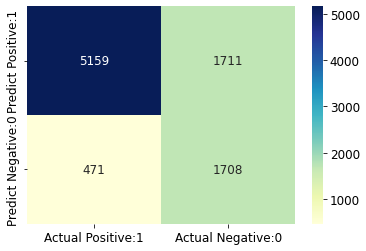

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
sensibilite = TP / float(TP+FN)
precision = TP / float(TP+FP)
Fmesure = 2*TP / float(2*TP + FP + FN)
specificite = TN / float(FP+TN)

In [ ]:
dict={'sensibilite':sensibilite,'precision':precision,'Fmesure':Fmesure,'specificite':specificite}


In [ ]:
print('Caractéristique bernouli')
print('\n')
for key, value in dict.items():
    print("la valeur de"+"  "+str(key)+"="+"  "+ str(value))

Caractéristique bernouli


la valeur de  sensibilite=  0.9163410301953819
la valeur de  precision=  0.7509461426491995
la valeur de  Fmesure=  0.82544
la valeur de  specificite=  0.4995612752266745


In [ ]:
y_pred2 = bnb.predict_proba(X_test)[:, 1]

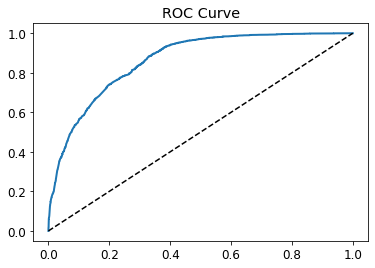

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label = ' >50K')

plt.figure(figsize=(6,4))
plt.title('ROC Curve')
plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.show()

#AUC

In [ ]:

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8632


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(bnb, X_train, y_train, cv = 10, scoring='accuracy')

print(scores)

[0.76231061 0.75094697 0.75319754 0.75556608 0.75935576 0.75509237
 0.76882994 0.75177641 0.74419706 0.75225012]


In [ ]:
scores.mean()

0.7553522852877425

#**Conclusion**:
#In this PT(practical tutorial) we used 2 naive bayesian models(bernouli/gaussian):
#We can compare between those 2 models by using K-folds, average score are :
#Gaussian : 0.8
#Bernouli : 0.75 
#We can also compare by using AUC score : 
#Gaussian : 0.806    
#Bernouli : 0.863:
#We can also compare f1 score...
#We can increase our scores by doing more feature engineering and more data transformation.